In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [50, 50]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([47., 53.])

In [4]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4600, 0.5400])

In [5]:
counts = Multinomial(1, fair_probs).sample((10000,))
counts

tensor([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [1., 0.]])

In [6]:
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
estimates = estimates.numpy()

cum_counts, estimates

(tensor([[1.0000e+00, 0.0000e+00],
         [1.0000e+00, 1.0000e+00],
         [1.0000e+00, 2.0000e+00],
         ...,
         [4.9140e+03, 5.0840e+03],
         [4.9140e+03, 5.0850e+03],
         [4.9150e+03, 5.0850e+03]]),
 array([[1.        , 0.        ],
        [0.5       , 0.5       ],
        [0.33333334, 0.6666667 ],
        ...,
        [0.4914983 , 0.5085017 ],
        [0.49144915, 0.5085509 ],
        [0.4915    , 0.5085    ]], dtype=float32))

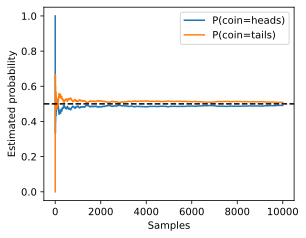

In [7]:
d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()


In [ ]:
# bayer theorem
# P(B|A) = P(A|B)P(B)/P(A)